## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd
import numpy as np

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv")


In [3]:
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [4]:
data.tail()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [5]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [6]:
print("Есть ли в таблице пропущенные значения:", "Да" if data.isna().any().any()  else "Нет")

Есть ли в таблице пропущенные значения: Нет


Выведем уникальные значения для каждого из столбцов

In [7]:
columns = data.columns
for i in columns:
    print(f'{i} - {data[i].unique()}')
    print('------------------------')

status - ['no checking account' '... < 0 DM'
 '... >= 200 DM / salary for at least 1 year' '0<= ... < 200 DM']
------------------------
duration - [18  9 12 10  8  6 24 11 30 48 36 15 42 21 27 33 28  4 47 14 39 60  5 22
 54 13 16  7 20 26 45 72 40]
------------------------
credit_history - ['all credits at this bank paid back duly'
 'no credits taken/all credits paid back duly'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'critical account/other credits elsewhere']
------------------------
purpose - ['car (used)' 'others' 'retraining' 'furniture/equipment' 'car (new)'
 'business' 'domestic appliances' 'radio/television' 'repairs' 'vacation']
------------------------
amount - [ 1049  2799   841  2122  2171  2241  3398  1361  1098  3758  3905  6187
  1957  7582  1936  2647  3939  3213  2337  7228  3676  3124  2384  1424
  4716  4771   652  1154  3556  4796  3017  3535  6614  1376  1721   860
  1495  1934  3378  3868   996  1755  1028  2825  1239  1216  

Для распределения признаков я обратился к описанию данных
Бинарные: telephone, foreign_worker, credit_risk - так как в описании сказано, что они бинарные

---

Количественные: duration, amount, age - количественные, так как выражают какие-то числовые характеристики


---


Катеригориальные: purpose, personal_status_sex, present_residence, property, other_installment_plans - разделение по категориям, где не получится сделать какую-то иерархию


---


Порядковые: status, credit_history, savings, employment_duration, installment_rate, other_debtors, property, housing, number_credits, job, people_liable - иерархические, где иерархию можно выделить явно/неявно

Очень много получилось порядковых признаков, так как на мой взгляд они имеют порядковое значение для банковской сферы и надёжности кредитора(например  housing в теории можно отнести к категориальным, но при этом, как надёжность кредитора это имеет большое значение, так как если он снимает жильё, то это накладывает ещё обязательства на него)


---

На всякий случай распишу: 
*   status - показывает статус сущ. счёта с уровнями(есть градация)
*   credit_history - кредитная история человека, как мне кажется, по ней можно выстроить неявную градацию с точки зрения банка
*   savings - уровни облигационного счета, можно выстроить иерархию
*   employment_duration - продолжительность трудоустройства, тут тоже можно выстроить порядок
*   installment_rate - ставка в процентах от существующего дохода, очевидно, что чем больше, тем хуже
*   other_debtors - созаёмщики, при их наличии, как мне кажется человек приоритетнее => можно выстраивать иерархию
*   property - залог, чем он дороже, тем лучше для банка, как мне кажется
*   housing - то, где проживает человек, если квартира в аренде, то это хуже, чем собственная
*   number_credits - количество кредитов, чем меньше, тем лучше
*   job - работа, по ней тоже можно выстроить иерархию
*   people_liable - количество людей, которые берут ответственность(чем больше, тем лучше)








### Задание 3 (0.5 балла)

In [8]:
df = data

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [9]:
df_grouped_by_purpose = df.groupby(by ='purpose')
df_grouped_by_purpose['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [10]:
df[(df['age']<30) & (df['housing']=='rent')]['housing'].count()/df[df['age']<30]['housing'].count() * 100

66.66666666666666

=> Процент клиентов моложе 30 лет, снимающих жилье равен 66.(6)%

In [11]:
df[(df['age']>40) & (df['housing']=='rent')]['housing'].count()/df[df['age']>40]['housing'].count() * 100

68.01470588235294

=> Процент клиентов моложе 30 лет, снимающих жилье равен 50.135501355013545%

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [12]:
df[(df['foreign_worker']=='yes')& ((df['number_credits']=='4-5') | (df['number_credits']=='>= 6'))]['age'].count()

1

### Задание 6 (1 балл)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

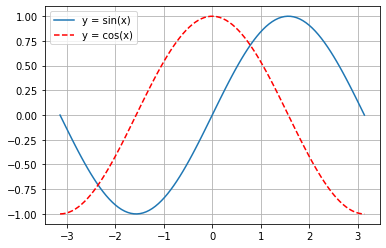

In [14]:
x = np.linspace(-np.pi, np.pi, 100)
y1 = np.array([np.sin(i) for i in x])
y2 = np.array([np.cos(i) for i in x])

fig, ax = plt.subplots()
ax.plot(x, y1, label='y = sin(x)')
ax.plot(x, y2, 'r--', label='y = cos(x)')
ax.grid(True)
ax.legend(loc="upper left")
plt.show()

Ну графики синусов... Они работают

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

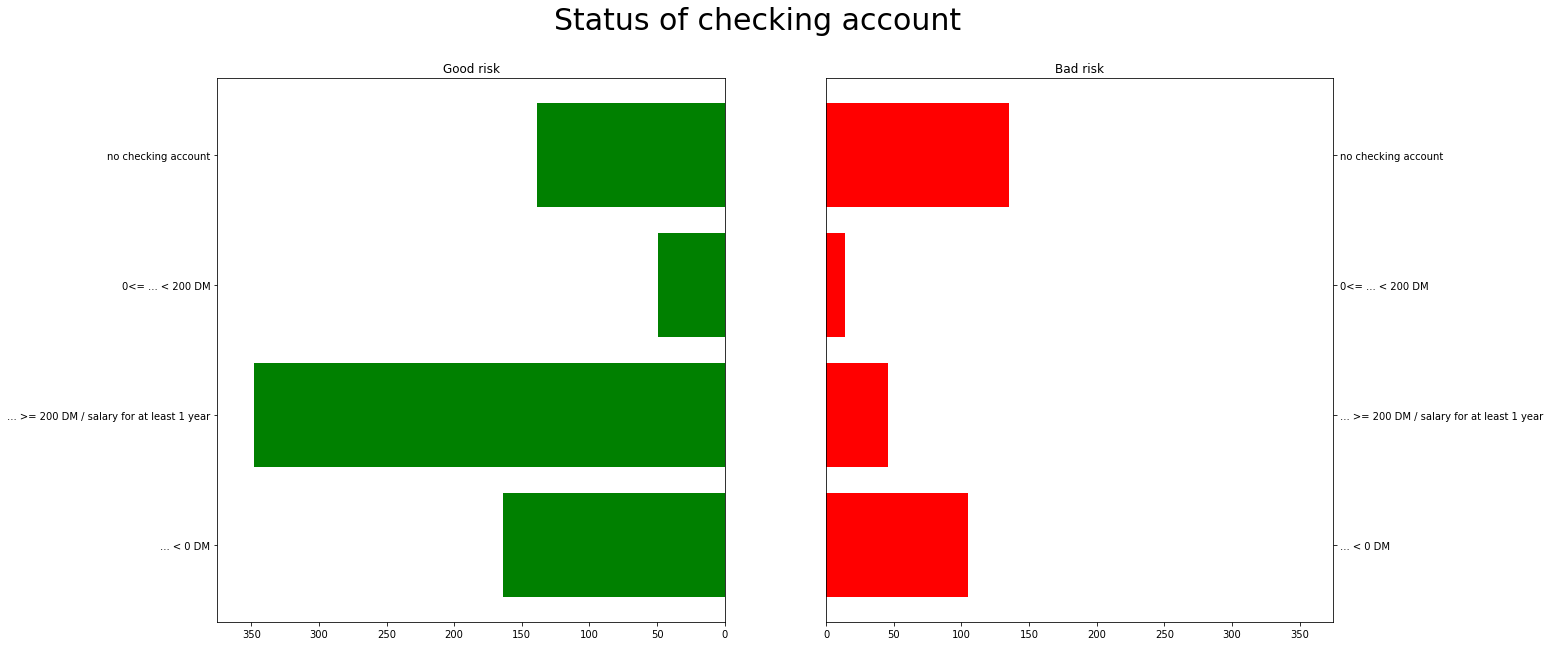

In [15]:
df_bad = df[df['credit_risk']=='bad'].groupby(by='status')
arr_bad = np.array(df_bad['status'].count())
df_good = df[df['credit_risk']=='good'].groupby(by='status')
arr_good = np.array(df_good['status'].count())
tipes = np.array(['... < 0 DM','... >= 200 DM / salary for at least 1 year','0<= ... < 200 DM','no checking account'])
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(10)

good = fig.add_subplot(1,2,1)
good.invert_xaxis()
good.barh(tipes,arr_good,color='green')
good.set_title("Good risk")
good.set_xlim(left=375)

bad = fig.add_subplot(1,2,2)
bad.yaxis.tick_right()
bad.barh(tipes,arr_bad,color='red')
bad.set_title("Bad risk")
bad.set_xlim(right=375)
fig.suptitle('Status of checking account', fontsize = 30)
plt.show()

Исходя из графиков можем заметить, что в целом люди получающие деньги имеют риск лучше, при этом люди без аккаунта имеют примерно равное распределение по риску. Люди получающие большую зарплату имеют статистически имеют "good risk" больше, чем "bad risk"

### Задание 8  (0.5 балла)

In [16]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

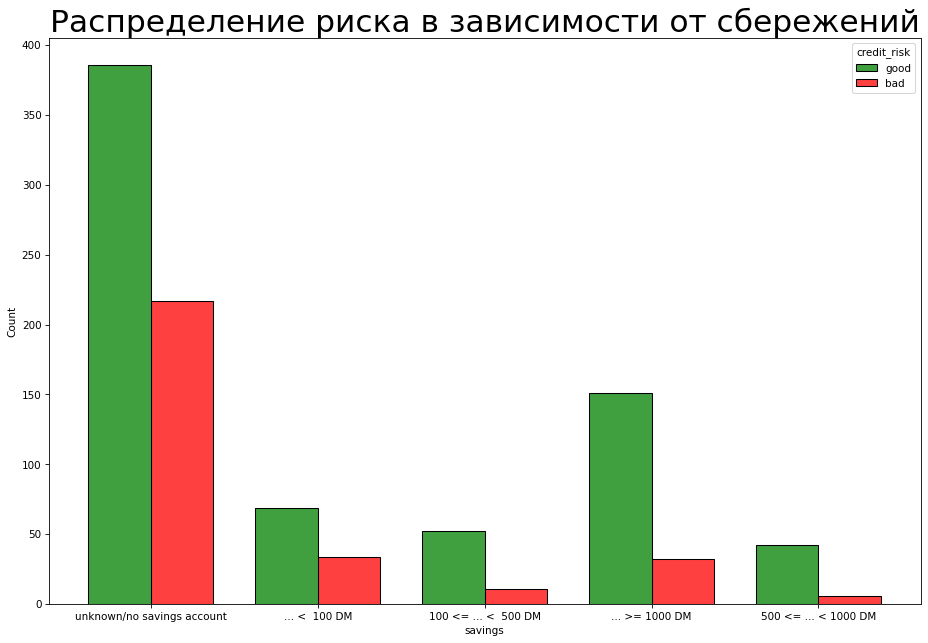

In [17]:
plt.figure(figsize=(15,10), dpi= 75)
sns.histplot(x='savings', hue='credit_risk', data=df, multiple='dodge', shrink=0.75, palette=['green', 'red'])
plt.title('Распределение риска в зависимости от сбережений', fontsize = 30)
plt.show()

В целом можно заметить, что "good risk" встречается чаще независимо от размера сбережений(что странно, очень много хорошего риска при отсутствие сбережений). Но можно заметить, что чем больше сбережения, то тем больше процент хорошего риска относительно плохого.

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

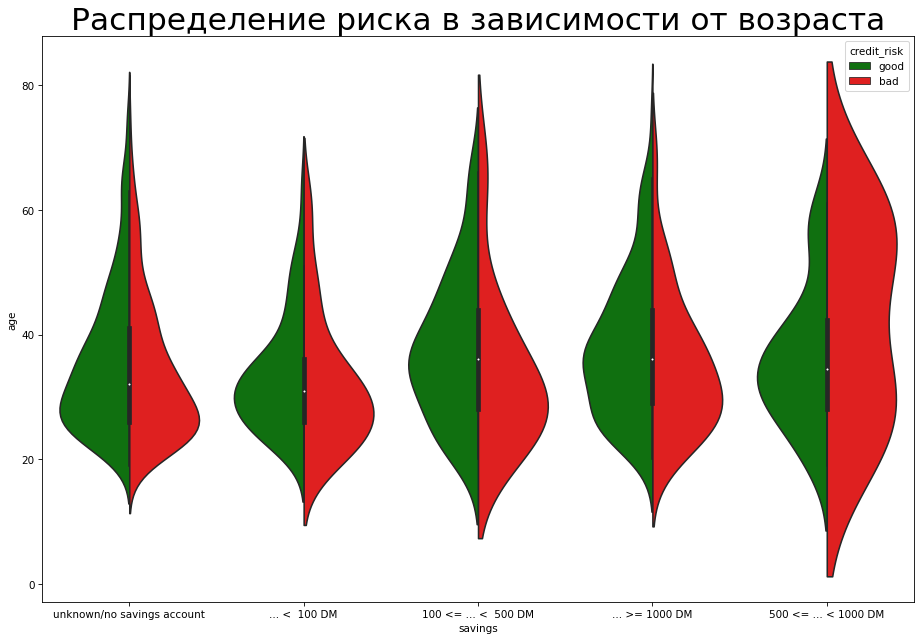

In [18]:
plt.figure(figsize=(15,10), dpi= 75)
sns.violinplot(x='savings', y='age', hue='credit_risk', data=df,scale='width',split=True, palette=['green', 'red'])
plt.title('Распределение риска в зависимости от возраста', fontsize = 30)
plt.show()

Честно говоря, не очень понимаю, что можно понять по этим графикам, но попробую... Можем заметить, что по всем типам распределения примерно симметрично количество плохих и хороших рисков, а вот если накопления большие, то достаточно большое количество плохих рисков, относительно хорошиз для молодых и пожилых людей.

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

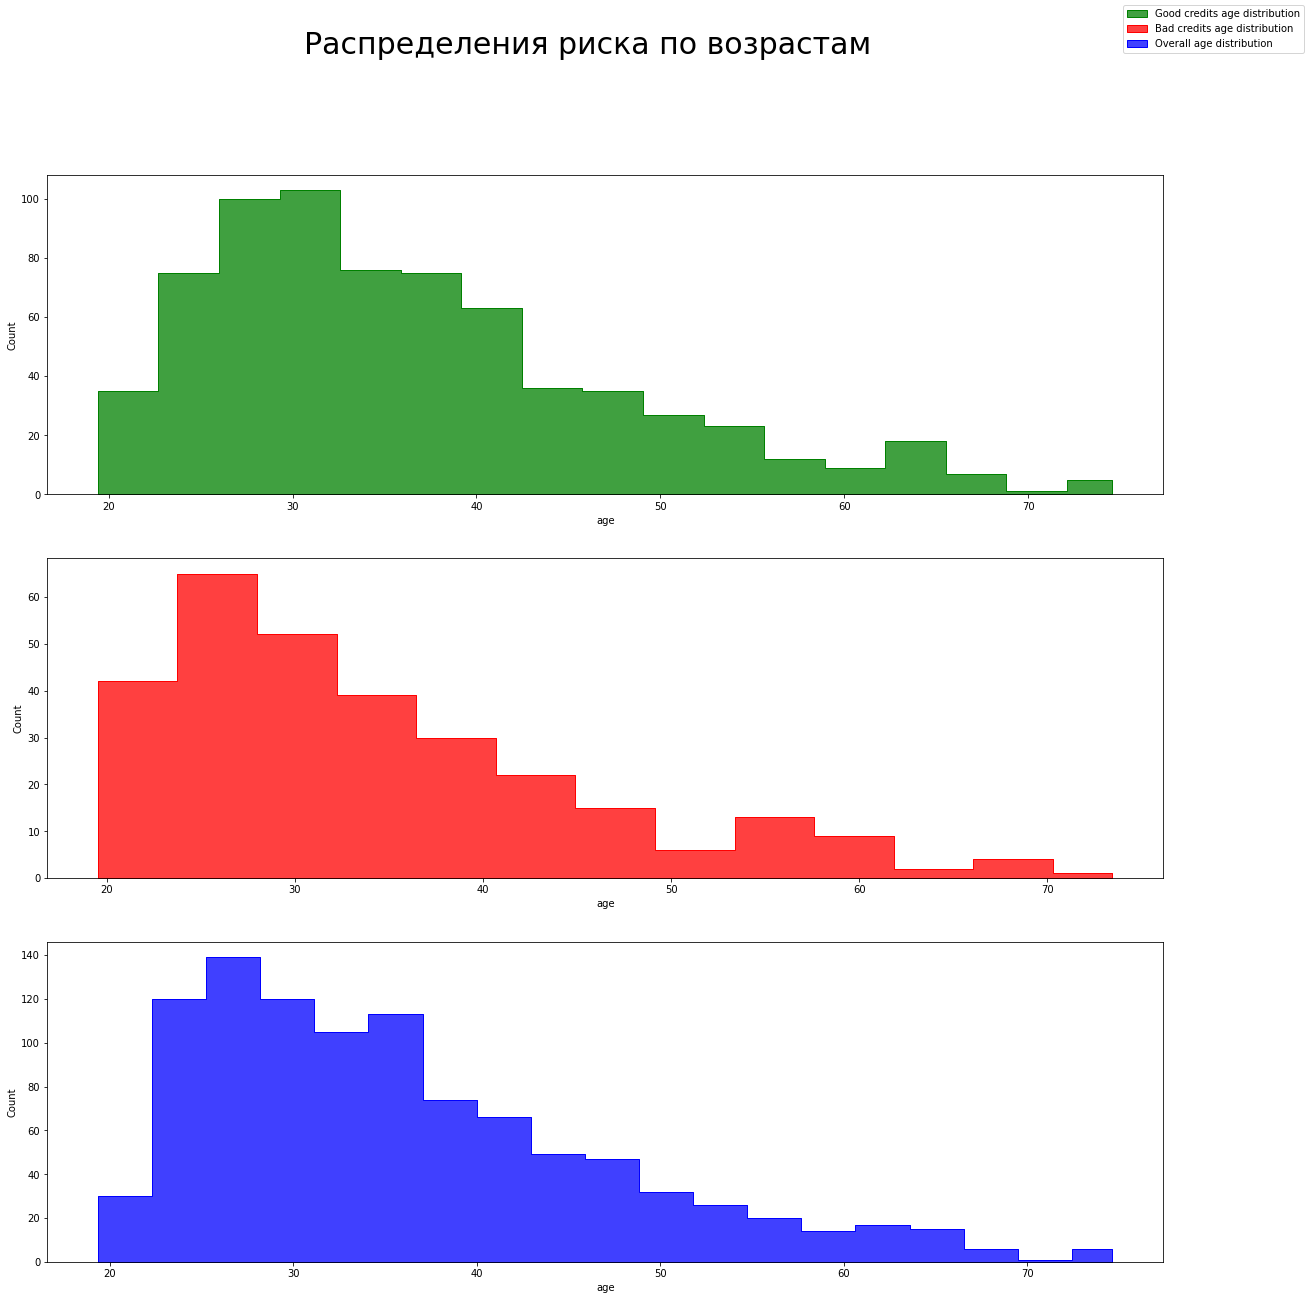

In [19]:

fig, axs = plt.subplots(3,1, figsize = (20,20))

plt.subplot(3,1,1)
sns.histplot(x='age', data=df[df['credit_risk']=='good'], element='step', shrink=0.75, color='green')
plt.subplot(3,1,2)
sns.histplot(x='age', data=df[df['credit_risk']=='bad'], element='step', shrink=0.75, color='red')
plt.subplot(3,1,3)
sns.histplot(x='age', data=df, element='step', shrink=0.75, color='blue')


fig.suptitle('Распределения риска по возрастам', fontsize = 30)
fig.legend(["Good credits age distribution", "Bad credits age distribution", "Overall age distribution"])
plt.show()

Можем заметить, что графики примерно похожи, единственное - среди пожилых людей хорошего риска больше, чем плохого. Так же заметим, что кредиторов от ~22 до ~35 лет наибольшее кол-во.

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

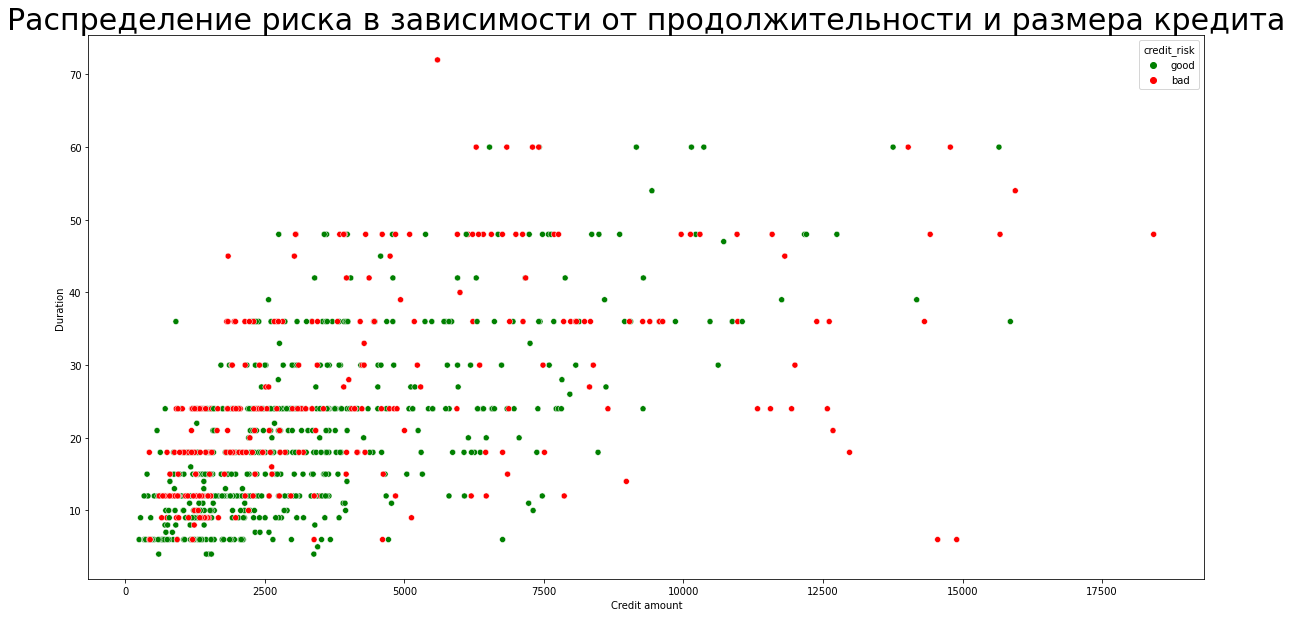

In [20]:
plt.figure(figsize=(20,10))
sns.scatterplot(data = df, x="amount", y="duration", hue='credit_risk', palette=['green', 'red']) 
plt.xlabel('Credit amount')
plt.ylabel('Duration')
plt.title('Распределение риска в зависимости от продолжительности и размера кредита', fontsize = 30)
plt.show() 

Заметим, что можно сказать, что у нас линейная зависимость количеста зеленых и красных точек. (симметрично относительно y=x). Так же выбросы в основном красные.

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

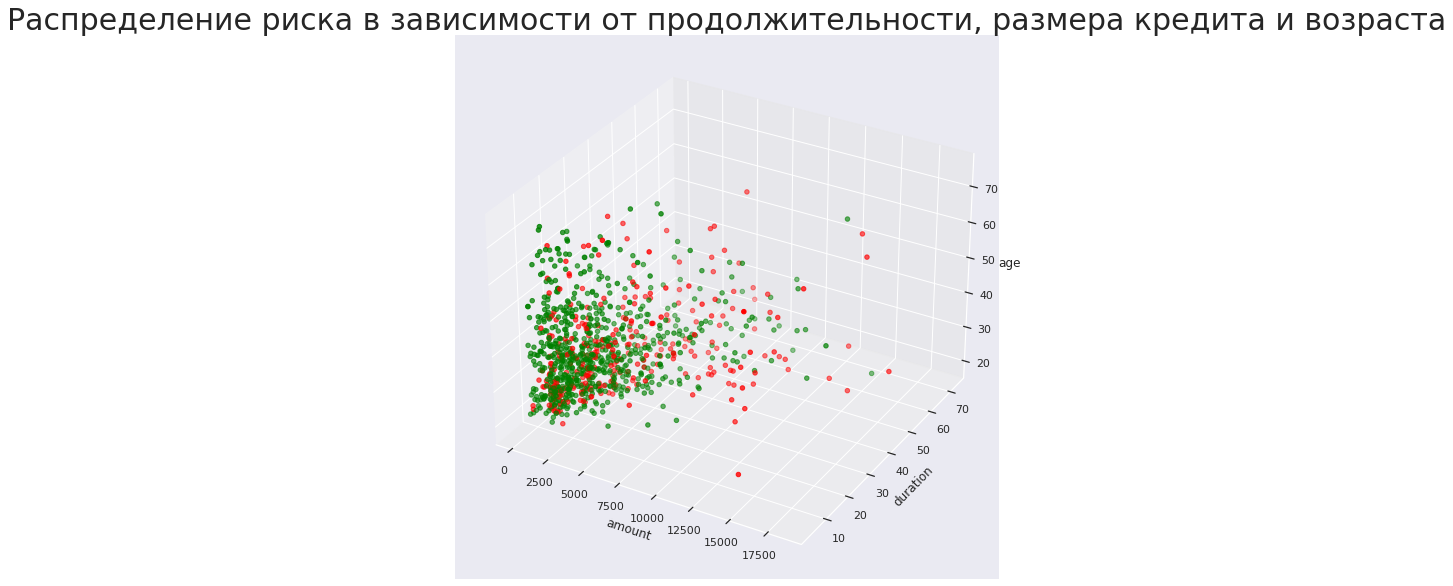

In [21]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection = '3d')

x = df['amount']
y = df['duration']
z = df['age']
color = df['credit_risk'].apply(lambda x: 'green' if x == 'good' else 'red')

ax.set_xlabel("amount")
ax.set_ylabel("duration")
ax.set_zlabel("age")

ax.scatter(x, y, z,color=color)
plt.title('Распределение риска в зависимости от продолжительности, размера кредита и возраста', fontsize = 30)
plt.show()

Тут можно увидеть большое скопление точек при небольшой сумме кредит и небольшой продолжительности, так же случаются "выбросы", какие-то удаленые точки, которые показывают уникальные случаи(в основном красные)

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

Для распределения признаков я обратился к описанию данных
Бинарные: telephone, foreign_worker, credit_risk - так как в описании сказано, что они бинарные

---
Катеригориальные: purpose, personal_status_sex, present_residence, property, other_installment_plans - разделение по категориям, где не получится сделать какую-то иерархию

---
Порядковые: status, credit_history, savings, employment_duration, installment_rate, other_debtors, property, housing, number_credits, job, people_liable - иерархические, где иерархию можно выделить явно/неявно

In [22]:
to_drop = ['purpose', 'personal_status_sex', 'property', 'other_installment_plans', 'present_residence']
df.drop(to_drop,axis=1,inplace=True)

In [23]:
replaces1 = {'no checking account': 1, '... < 0 DM': 2, '0<= ... < 200 DM': 3, '... >= 200 DM / salary for at least 1 year': 4}
df['status'] = df['status'].map(replaces1)

replaces2 = {'all credits at this bank paid back duly': 1, 'no credits taken/all credits paid back duly': 2, 'existing credits paid back duly till now': 3, 'delay in paying off in the past': 4, 'critical account/other credits elsewhere': 5}
df['credit_history'] = df['credit_history'].map(replaces2)

replaces3 = {'unknown/no savings account': 1, '... <  100 DM': 2, '100 <= ... <  500 DM': 3, '500 <= ... < 1000 DM': 4, '... >= 1000 DM': 5}
df['savings'] = df['savings'].map(replaces3)

replaces4 = {'unemployed': 1, '< 1 yr': 2, '1 <= ... < 4 yrs': 3, '4 <= ... < 7 yrs': 4, '>= 7 yrs': 5}
df['employment_duration'] = df['employment_duration'].map(replaces4)

replaces5 = {'< 20': 1, '20 <= ... < 25': 2, '25 <= ... < 35': 3, '>= 35': 4}
df['installment_rate'] = df['installment_rate'].map(replaces5)

replaces6 = {'none': 1, 'guarantor': 2, 'co-applicant': 3}
df['other_debtors'] = df['other_debtors'].map(replaces6)

replaces8 = {'for free': 1, 'rent': 2, 'own': 3}
df['housing'] = df['housing'].map(replaces8)

replaces9 = {'>= 6': 1, '4-5': 2, '2-3': 3, '1': 4}
df['number_credits'] = df['number_credits'].map(replaces9)

replaces10 = {'unemployed/unskilled - non-resident': 1, 'unskilled - resident': 2, 'skilled employee/official': 3, 'manager/self-empl./highly qualif. employee': 4}
df['job'] = df['job'].map(replaces10)

replaces11 = {'0 to 2': 1, '3 or more': 2}
df['people_liable'] = df['people_liable'].map(replaces11)


In [24]:
replaces12 = {'no': 0, 'yes (under customer name)': 1}
df['telephone'] = df['telephone'].map(replaces12)

replaces13 = {'no': 0, 'yes': 1}
df['foreign_worker'] = df['foreign_worker'].map(replaces13)

replaces14 = {'bad': 0, 'good': 1}
df['credit_risk'] = df['credit_risk'].map(replaces14)


In [25]:
df.head()

,status,duration,credit_history,amount,savings,employment_duration,installment_rate,other_debtors,age,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,1,1049,1,2,1,1,21,1,4,3,1,0,0,1
1,1,9,1,2799,1,3,3,1,36,1,3,3,2,0,0,1
2,2,12,2,841,2,4,3,1,23,1,4,2,1,0,0,1
3,1,12,1,2122,1,3,2,1,39,1,3,2,2,0,1,1
4,1,12,1,2171,1,3,1,1,38,2,3,2,1,0,1,1


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [26]:
def predict(Xtest: np.array) -> np.array:
  # #['status', 'duration', 'credit_history', 'amount', 'savings',
  #      'employment_duration', 'installment_rate', 'other_debtors', 'age',
  #      'housing', 'number_credits', 'job', 'people_liable', 'telephone',
  #      'foreign_worker']
    
    ans = []
    for arr in Xtest:
      status = arr[0]
      duration = arr[1]
      credit_history = arr[2]
      amount = arr[3]
      savings = arr[4]
      employment_duration = arr[5]
      installment_rate = arr[6]
      other_debtors = arr[7]
      age = arr[8]
      housing = arr[9]
      number_credits = arr[10]
      job = arr[11]
      people_liable  = arr[12]
      telephone = arr[13]
      foreign_worker = arr[14]
      summ = 1/6*duration*age # чем старше человек, тем невыгоднее давать ему длительные кредиты
      summ += -0.3*credit_history*number_credits*installment_rate # если у человека много кредитов и он их исправно платит, то это лучше, чем много кредитов, по которым он не платит, ставка так же имеет значение
      summ += 1/2*status*savings-amount*0.001 # оценка сбережений и суммы кредита человека
      summ += 0.5*employment_duration*job+10 - 5*foreign_worker # оценка работы человека
      summ += 1/2*other_debtors*housing*people_liable+15*telephone # оценка гарантий
      ans.append(1 if summ>50 else 0)
    return np.array(ans)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
accuracy_score(y_test, predict(X_test))

<ipython-input-26-9ebbba70ff1f>:34: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('credit_risk', 1).values


0.644